##  Cluster analysis

Your mission is to analyze a data set of social attitudes by turning it into vectors, then visualizing the result.

### 1. Choose a topic and get your data

We're going to be working with data from the General Social Survey, which asks Americans thousands of questions ever year, over decades. This is an enormous data set and there have been very many stories written from its data. The first thing you need to do is decide which questions and which years you are going to try to analyze.

Use their [data explorer](https://gssdataexplorer.norc.org/) to see what's available, and ultimately download an Excel file with the data.







In [126]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import math
from mpl_toolkits.mplot3d import Axes3D

In [127]:
# load your data set here
A= pd.read_csv('Data-Table 2.csv')
A.head()

,Gss year for this respondent,Happiness of marriage,National defense -- version y,Space exploration -- version y,Foreign aid,"Military, armaments, and defense",Improving nations education system,Improving & protecting nations health,Improving & protecting environment,Space exploration program,Think of self as liberal or conservative,Political party affiliation,Marital status,Respondent id number,Ballot used for interview
0,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,"Ind,near dem",Never married,1.0,Not applicable
1,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not str democrat,Married,2.0,Not applicable
2,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Independent,Married,3.0,Not applicable
3,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not str democrat,Married,4.0,Not applicable
4,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Strong democrat,Married,5.0,Not applicable


In [128]:
#to clear the last two rows
A= A.iloc[0:-2,:]

In [129]:
A= A.rename(columns={"Gss year for this respondent                       ": "Year",
                    'Ballot used for interview':'Ballot',
                    'Respondent id number':'ID',
                    'Think of self as liberal or conservative':'Think'})
A

,Year,Happiness of marriage,National defense -- version y,Space exploration -- version y,Foreign aid,"Military, armaments, and defense",Improving nations education system,Improving & protecting nations health,Improving & protecting environment,Space exploration program,Think,Political party affiliation,Marital status,ID,Ballot
0,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,"Ind,near dem",Never married,1.0,Not applicable
1,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not str democrat,Married,2.0,Not applicable
2,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Independent,Married,3.0,Not applicable
3,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not str democrat,Married,4.0,Not applicable
4,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Strong democrat,Married,5.0,Not applicable
5,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,"Ind,near dem",Never married,6.0,Not applicable
6,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,"Ind,near dem",Divorced,7.0,Not applicable
7,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,"Ind,near dem",Never married,8.0,Not applicable
8,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Strong democrat,Never married,9.0,Not applicable
9,1972,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Strong democrat,Married,10.0,Not applicable


In [130]:
A.columns

Index(['Year', 'Happiness of marriage', 'National defense -- version y',
       'Space exploration -- version y', 'Foreign aid',
       'Military, armaments, and defense',
       'Improving nations education system',
       'Improving & protecting nations health',
       'Improving & protecting environment', 'Space exploration program',
       'Think', 'Political party affiliation', 'Marital status', 'ID',
       'Ballot'],
      dtype='object')

In [131]:
A.tail()

,Year,Happiness of marriage,National defense -- version y,Space exploration -- version y,Foreign aid,"Military, armaments, and defense",Improving nations education system,Improving & protecting nations health,Improving & protecting environment,Space exploration program,Think,Political party affiliation,Marital status,ID,Ballot
62461,2016,Very happy,Not applicable,Not applicable,About right,About right,Too little,About right,Too little,About right,Extremely liberal,Strong democrat,Married,2863.0,Ballot b
62462,2016,Not applicable,Too little,Too little,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Conservative,Other party,Widowed,2864.0,Ballot a
62463,2016,Pretty happy,Too little,About right,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Moderate,Not str republican,Married,2865.0,Ballot b
62464,2016,Pretty happy,Not applicable,Not applicable,Too much,Too little,About right,Too little,About right,About right,Slghtly conservative,Not str republican,Married,2866.0,Ballot a
62465,2016,Pretty happy,Too much,Too little,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable,Slghtly conservative,Independent,Married,2867.0,Ballot c


In [135]:
A = A.drop(['Ballot','ID'],axis= 1)

In [136]:
A = A.replace({'Not applicable' : None, 
                   'No answer' : None, 
                   'Don\'t know' : None,
                   'Dont know' : None})

In [137]:
A.replace({'Strong republican':-3,
            'Not str republican':-2,
           'Ind,near rep':-1,
           'Independent':0,
           'Ind,near dem':1,
           'Not str democrat':2,
           'Strong democrat':3,
           'Other party':4},inplace = True)
A.replace({'About right':0,
          'Too little':1,
          'Too much':2},inplace = True)
A.replace({'Not too happy':0,
           'Pretty happy':1,
           'Very happy':2},inplace = True)
A.replace({'Extrmly conservative':-3,
           'Slghtly conservative':-2,
           'Conservative':-1,
           'Moderate':0,
           'Liberal':1,
           'Slightly liberal':2,
           'Extremely liberal':3},inplace = True)
A.replace({'Married':2,
           'Separated':1,
           'Never married':0,
           'Divorced':-1,
           'Widowed':-2},inplace = True)
A= A.fillna('-4')


In [138]:
A.columns

Index(['Year', 'Happiness of marriage', 'National defense -- version y',
       'Space exploration -- version y', 'Foreign aid',
       'Military, armaments, and defense',
       'Improving nations education system',
       'Improving & protecting nations health',
       'Improving & protecting environment', 'Space exploration program',
       'Think', 'Political party affiliation', 'Marital status'],
      dtype='object')

In [139]:
A_2016 = A[A["Year"].str.contains("2016")]
A_2016 = A_2016.drop(["Year"],axis =1)
A_2016.head(20)

,Happiness of marriage,National defense -- version y,Space exploration -- version y,Foreign aid,"Military, armaments, and defense",Improving nations education system,Improving & protecting nations health,Improving & protecting environment,Space exploration program,Think,Political party affiliation,Marital status
59599,2,-4,-4,2,2,0,0,1,1,0,0,2
59600,-4,-4,-4,-4,2,1,1,-4,-4,1,1,0
59601,2,-4,-4,2,-4,1,1,0,1,-1,-2,2
59602,2,-4,-4,2,1,1,2,0,0,0,-2,2
59603,2,0,1,-4,-4,-4,-4,-4,-4,2,2,2
59604,2,-4,-4,2,2,1,1,1,0,2,2,2
59605,2,-4,-4,0,1,1,0,0,0,2,-2,2
59606,2,-4,-4,0,0,1,0,1,0,-2,1,2
59607,1,-4,-4,0,0,1,0,1,0,-4,3,2
59608,-4,1,1,-4,-4,-4,-4,-4,-4,-1,-3,-1


In [17]:
# So here the data in 2016, and it has tow columns, one is people's party affilation, and the other is their attitudes to 
# government's space program bugets. 



### 3. Turn people  into vectors
I know, it sounds cruel. We're trying to group people, but computers can only group vectors, so there we are. 

Translating the spreadsheet you downloaded from GSS Explorer into vectors is a multistep process. Generally, each row of the spreadsheet is one person, and each column is one qeustion. 

- First, we need to throw away any extra rows and columns: headers, questions with no data, etc.
- Many GSS questions already have numerical answers. These usually don't require any work.
- But you'll need to turn categorical variables into numbers. Here's [how to turn categorical variables into numbers](http://pbpython.com/categorical-encoding.html) in Pandas.


The easiest way to turn categories into numbers is like this:

In [18]:
#df = pd.DataFrame({'numbers':[100,50,200,10,150], 'animal':['cat','frog','cat','moose','frog']})
#df

In [19]:
#df['animal'] = df['animal'].astype('category')
#df # now it looks the same, but it's stored internally as category codes

In [20]:
# add a new column with the numeric representation of the categorical column
#df['animal-code'] = df['animal'].cat.codes
#df 



When you're done preparing up your data, your data frame of vectors should have one row per person and one column per question, and only numeric values. Everything else -- including the original categorical answers and any other information -- has to go. Actually, save it in a separate dataframe, we'll use it later for interpretation.

In [21]:
# Turn your dataframe into feature vectors here



In [140]:
# make a PCA plot here
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [141]:
gss= A_2016
gss.head()

,Happiness of marriage,National defense -- version y,Space exploration -- version y,Foreign aid,"Military, armaments, and defense",Improving nations education system,Improving & protecting nations health,Improving & protecting environment,Space exploration program,Think,Political party affiliation,Marital status
59599,2,-4,-4,2,2,0,0,1,1,0,0,2
59600,-4,-4,-4,-4,2,1,1,-4,-4,1,1,0
59601,2,-4,-4,2,-4,1,1,0,1,-1,-2,2
59602,2,-4,-4,2,1,1,2,0,0,0,-2,2
59603,2,0,1,-4,-4,-4,-4,-4,-4,2,2,2


In [151]:
model = PCA(n_components=3)
out = model.fit_transform(A_2016) 

In [152]:
out

array([[ 7.26082512,  3.91279916, -0.39212925],
       [ 2.30115809, -2.44572825, -0.84735462],
       [ 5.46846113,  4.28358569,  1.94374957],
       ...,
       [-6.53917946,  3.35322274,  1.52179406],
       [ 6.58296147,  3.4333207 ,  2.46021594],
       [-7.25882045,  3.16059039,  0.71945603]])

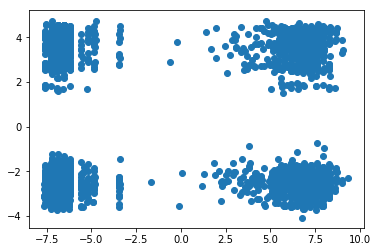

In [153]:
plt.scatter(out[:, 0], out[:, 1])
plt.show()

### 5. Add color to help interpretation
Congratulations, you have a picture of a blob of dots. Hopefully, that blob has some structure representing clusters of similar people. To understand what the plot is telling us, it really helps to take one of the original variables and use it to assign colors to the points. 

So: pick one of the questions that you think will separate people into natural groups. Use it to set the color of the dots in your scatterplot. By repeating this with different questions, or combining questions (like two binary questions giving rise to a four color scheme) you should be able to figure out what the structure of the clusters represents. 


In [154]:
# map integer columns to colors
def col2colors(colvals):
    # gray for zero, then a rainbow.
    # This is set up so yes = 1 = red and no = -1 = indigo
    my_colors = ['gray', 'red','orange','yellow','lightgreen','cyan','blue','indigo']
    
    # We may have integers higher than len(my_colors) or less than zero
    # So use the mod operator (%) to make values "wrap around" when they go off the end of the list
    column_ints = colvals.astype(int) % len(my_colors)
    
    # map each index to the corresponding color
    return column_ints.apply(lambda x: my_colors[x])

In [155]:
def plot_gss_column(colname):
    plt.scatter(out[:, 0], out[:, 1], c=col2colors(gss[colname]))
    plt.title(colname)
    plt.show()

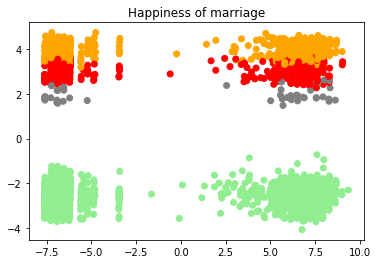

In [156]:
# Make a plot using colors from a particular column
plot_gss_column('Happiness of marriage')

# Make another plot using colors from another column

# ... repeat and see if you can figure out what each axis means

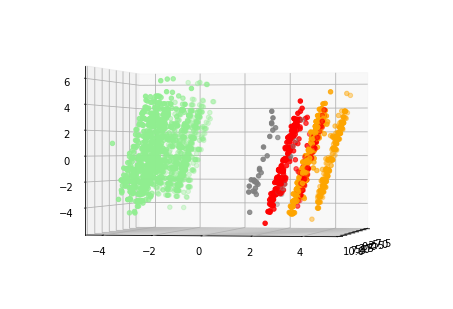

In [157]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0, azim=10)
ax.scatter(out[:, 0], out[:, 1], out[:, 2],c = col2colors(gss['Happiness of marriage']))


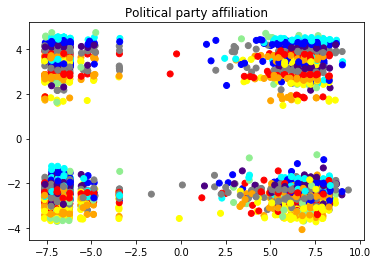

In [158]:
plot_gss_column('Political party affiliation')

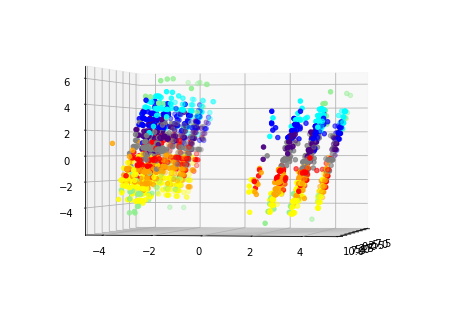

In [125]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0, azim=10)
ax.scatter(out[:, 0], out[:, 1], out[:, 2],c = col2colors(gss['Political party affiliation']))


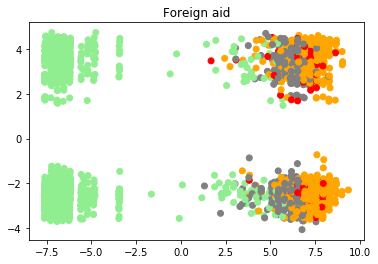

In [93]:
plot_gss_column('Foreign aid')

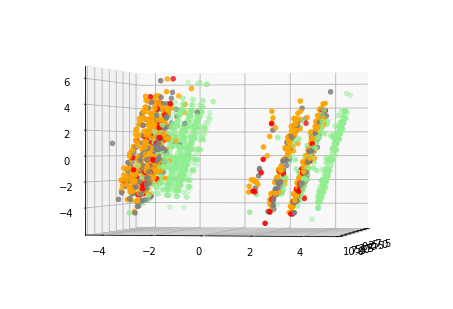

In [126]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0, azim=10)
ax.scatter(out[:, 0], out[:, 1], out[:, 2],c = col2colors(gss['Foreign aid']))

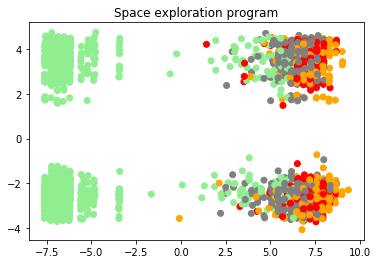

In [94]:
plot_gss_column('Space exploration program')

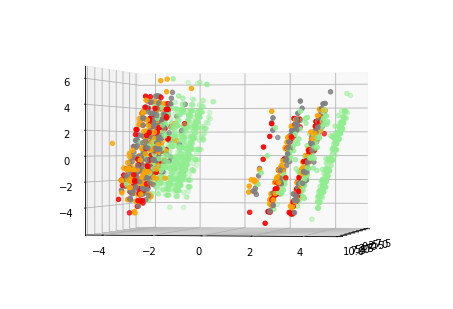

In [127]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0, azim=10)
ax.scatter(out[:, 0], out[:, 1], out[:, 2],c = col2colors(gss['Space exploration program']))

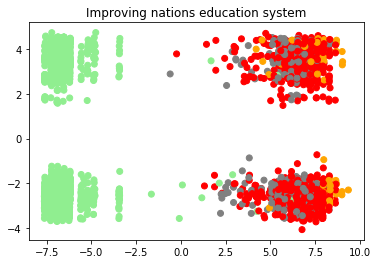

In [95]:
plot_gss_column('Improving nations education system')

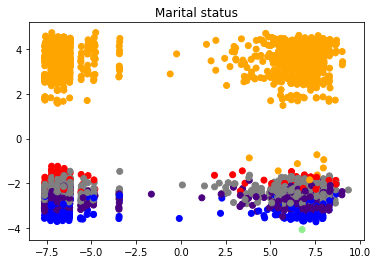

In [105]:
plot_gss_column('Marital status')

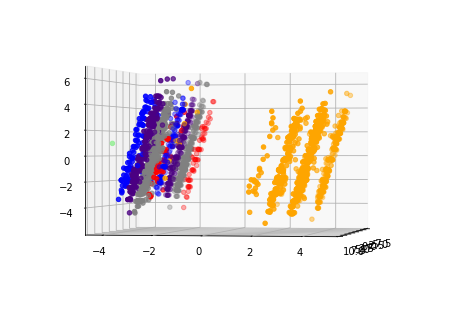

In [128]:
fig = plt.figure()
ax = Axes3D(fig)
ax.view_init(elev=0, azim=10)
ax.scatter(out[:, 0], out[:, 1], out[:, 2],c = col2colors(gss['Marital status']))

In [16]:
# What does it all mean?

#*All data I chose only include categories answers, no continuious data,such as income. 
#*In my replacement, I give'None'(the answers include 'I don't know','no answers') the most negative 
#number -4, in case they mix with other answer with 0. 

# What I can understand.

# 1. The four seperated parts mean data has already been distributed by (I guess identities(here I have two identities
# options, one is Political party affiliation, the other is 'Think of self as liberal or conservative' )), so the different
# column name give us their distributions.
# 2. Basically, we can see their answer options distributions, for example, in Happiness of marriage, the lightgreen
# color means 'I don't know' or 'no answer' part, because I give them the most negative number, so they seperate alone, 
# second, we can see the red and orange parts, which mean 'pretty happy' and 'very happy', and then the grey part,'Not too
# happy'.
# 3. By the difference of charts display in a vertical way or a horiztional way, we maybe can see they are different. 
# for example, the Happiniess of marriage and Marital status, both in vertical way, so people answers these questions, maybe
# give simillar attitude, and people give different attitude to the question of Happiniess of marriage and the Space program.

#What I don't understand.


# 1. Unclear color. In Marital status, I don't understand where the purple color comes from? 


# What I expect.
#1. Compared to 12 independent variables, what I more want to do is see two varibles correlations, which is similar with
# the Britian votes example in class. For example, I want to see in the space programs budget attitude in different party affliation identities,
# the republic people think the budget too much? too little? Or the demostracts they have happier marriages?
# 2.So I tried the following. 


In [159]:
A.tail()

,Year,Happiness of marriage,National defense -- version y,Space exploration -- version y,Foreign aid,"Military, armaments, and defense",Improving nations education system,Improving & protecting nations health,Improving & protecting environment,Space exploration program,Think,Political party affiliation,Marital status
62461,2016,2,-4,-4,0,0,1,0,1,0,3,3,2
62462,2016,-4,1,1,-4,-4,-4,-4,-4,-4,-1,4,-2
62463,2016,1,1,0,-4,-4,-4,-4,-4,-4,0,-2,2
62464,2016,1,-4,-4,2,1,0,1,0,0,-2,-2,2
62465,2016,1,2,1,-4,-4,-4,-4,-4,-4,-2,0,2


In [29]:
A.columns

Index(['Year', 'Happiness of marriage', 'National defense -- version y',
       'Space exploration -- version y', 'Foreign aid',
       'Military, armaments, and defense',
       'Improving nations education system',
       'Improving & protecting nations health',
       'Improving & protecting environment', 'Space exploration program',
       'Think of self as liberal or conservative',
       'Political party affiliation', 'Marital status', 'Respondent id number',
       'Ballot used for interview'],
      dtype='object')

In [162]:
#B is Political Party's marriage happiness survey.
B= A.iloc[:,[0,1,-2]]
B_2016 = B[B['Year'] == '2016']

B_2016 = B_2016.drop(columns='Year',axis =1)
B_2016.head()

,Happiness of marriage,Political party affiliation
59599,2,0
59600,-4,1
59601,2,-2
59602,2,-2
59603,2,2


In [65]:
# give rainbow color to party affillation.
def party_color(x):
    p = {
        -3 : 'red',
        -2 :'orange',
        -1 : 'yellow',
        0 : 'lightgreen',
        1 : 'green',
        2:'blue',
        3:'purple'  
    }
    return p.get(int(x),'black')

colors = [party_color(x) for x in A['Political party affiliation']]

colors

['green',
 'blue',
 'lightgreen',
 'blue',
 'purple',
 'green',
 'green',
 'green',
 'purple',
 'purple',
 'purple',
 'orange',
 'purple',
 'blue',
 'purple',
 'purple',
 'yellow',
 'yellow',
 'green',
 'yellow',
 'green',
 'blue',
 'green',
 'yellow',
 'red',
 'yellow',
 'lightgreen',
 'green',
 'lightgreen',
 'orange',
 'red',
 'yellow',
 'purple',
 'orange',
 'green',
 'blue',
 'orange',
 'blue',
 'red',
 'orange',
 'purple',
 'orange',
 'yellow',
 'green',
 'orange',
 'lightgreen',
 'blue',
 'black',
 'blue',
 'red',
 'purple',
 'green',
 'green',
 'yellow',
 'purple',
 'lightgreen',
 'purple',
 'purple',
 'purple',
 'blue',
 'orange',
 'orange',
 'red',
 'red',
 'orange',
 'black',
 'black',
 'lightgreen',
 'green',
 'orange',
 'blue',
 'green',
 'orange',
 'lightgreen',
 'blue',
 'green',
 'blue',
 'purple',
 'orange',
 'lightgreen',
 'blue',
 'yellow',
 'yellow',
 'black',
 'lightgreen',
 'orange',
 'blue',
 'black',
 'green',
 'blue',
 'lightgreen',
 'purple',
 'black',
 'orang

In [66]:
model = PCA(n_components=2)
out = model.fit_transform(B_2016)  
out

array([[ 3.67216244, -0.29980263],
       [-2.40910653, -0.16501481],
       [ 4.04459465,  1.66521499],
       ...,
       [ 3.06208584,  1.8514311 ],
       [ 3.06208584,  1.8514311 ],
       [ 2.68965363, -0.11358652]])

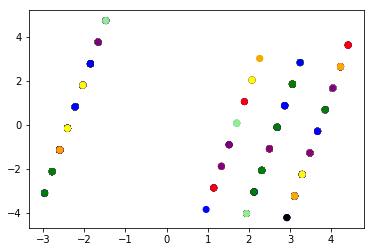

In [67]:
plt.scatter(out[:, 0],out[:,1],c= colors)

In [ ]:
# In term of colors and numbers I give the data, I think the very left columns means the 'None' answer, which are 'I don;t'
# know' or 'No answers'. 

# so the very right columns should be the oposite, 'very happy', in this column, we can see two orange dots and two purple
# dots, which are more than other one color of one dot, so we can see, 'Not str Republic' and 'Strong Democrates', they
# have more people to feel 'very happy 'about their marrige than others. And the second right column mean'pretty happy',
# so the 'inde, close-demo' poeple, which are green color, they have the major choice here. 
# And, in 'not very happy' opintions, strong republic and strong democrates, chose more this option than others. 


In [166]:
# to see the liberal and conserative identity info, to see their opinion on space exploration budget.
C= A.iloc[:,[0,-4,-3]]
C_2016 = C[C['Year'] == '2016']

C_2016 = C_2016.drop(columns='Year',axis =1)
C_2016.head()

,Space exploration program,Think
59599,1,0
59600,-4,1
59601,1,-1
59602,0,0
59603,-4,2


In [167]:
# give rainbow color to 'think'.
def party_color(x):
    p = {
        -3 : 'red',
        -2 :'orange',
        -1 : 'yellow',
        0 : 'lightgreen',
        1 : 'green',
        2:'blue',
        3:'purple'  
    }
    return p.get(int(x),'black')

colors = [party_color(x) for x in C_2016['Think']]

colors

['lightgreen',
 'green',
 'yellow',
 'lightgreen',
 'blue',
 'blue',
 'blue',
 'orange',
 'black',
 'yellow',
 'black',
 'orange',
 'blue',
 'green',
 'lightgreen',
 'lightgreen',
 'yellow',
 'blue',
 'green',
 'green',
 'green',
 'orange',
 'blue',
 'red',
 'green',
 'black',
 'green',
 'lightgreen',
 'lightgreen',
 'yellow',
 'green',
 'lightgreen',
 'orange',
 'orange',
 'lightgreen',
 'yellow',
 'yellow',
 'lightgreen',
 'yellow',
 'lightgreen',
 'red',
 'lightgreen',
 'lightgreen',
 'green',
 'lightgreen',
 'purple',
 'green',
 'purple',
 'blue',
 'purple',
 'green',
 'purple',
 'orange',
 'lightgreen',
 'yellow',
 'purple',
 'lightgreen',
 'blue',
 'green',
 'orange',
 'lightgreen',
 'yellow',
 'lightgreen',
 'blue',
 'lightgreen',
 'red',
 'blue',
 'red',
 'orange',
 'lightgreen',
 'black',
 'lightgreen',
 'lightgreen',
 'orange',
 'blue',
 'green',
 'purple',
 'purple',
 'purple',
 'black',
 'blue',
 'orange',
 'orange',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'lightgreen

In [168]:
model = PCA(n_components=2)
out = model.fit_transform(C_2016)  
out

array([[ 2.86626683, -0.08394605],
       [-2.08280406, -1.31142203],
       [ 2.82056264,  0.91500897],
       ...,
       [-2.12850825, -0.31246701],
       [ 1.77590343,  1.86825979],
       [-2.21991663,  1.68544303]])

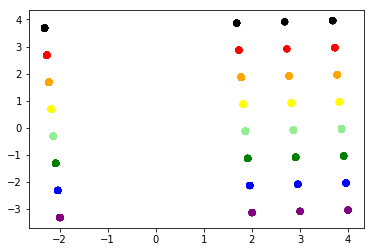

In [169]:
plt.scatter(out[:, 0],out[:,1],c= colors)

In [170]:
# to see party affilitation on space program budget question.
D= A.iloc[:,[0,-4,-2]]
D_2016 = D[D['Year'] == '2016']

D_2016 = D_2016.drop(columns='Year',axis =1)
D_2016.head()

,Space exploration program,Political party affiliation
59599,1,0
59600,-4,1
59601,1,-2
59602,0,-2
59603,-4,2


In [171]:
def party_color(x):
    p = {
        -3 : 'red',
        -2 :'orange',
        -1 : 'yellow',
        0 : 'lightgreen',
        1 : 'green',
        2:'blue',
        3:'purple'  
    }
    return p.get(int(x),'black')

colors = [party_color(x) for x in D_2016['Political party affiliation']]

colors

['lightgreen',
 'green',
 'orange',
 'orange',
 'blue',
 'blue',
 'orange',
 'green',
 'purple',
 'red',
 'purple',
 'red',
 'green',
 'purple',
 'lightgreen',
 'lightgreen',
 'black',
 'purple',
 'green',
 'purple',
 'purple',
 'lightgreen',
 'green',
 'lightgreen',
 'yellow',
 'purple',
 'purple',
 'lightgreen',
 'blue',
 'yellow',
 'green',
 'lightgreen',
 'yellow',
 'blue',
 'purple',
 'red',
 'green',
 'lightgreen',
 'red',
 'purple',
 'green',
 'purple',
 'orange',
 'blue',
 'orange',
 'purple',
 'blue',
 'green',
 'lightgreen',
 'purple',
 'blue',
 'purple',
 'orange',
 'yellow',
 'red',
 'green',
 'blue',
 'blue',
 'purple',
 'purple',
 'lightgreen',
 'lightgreen',
 'lightgreen',
 'blue',
 'blue',
 'purple',
 'yellow',
 'blue',
 'purple',
 'blue',
 'blue',
 'purple',
 'blue',
 'purple',
 'green',
 'lightgreen',
 'blue',
 'purple',
 'purple',
 'black',
 'blue',
 'black',
 'yellow',
 'yellow',
 'blue',
 'red',
 'yellow',
 'green',
 'green',
 'green',
 'blue',
 'blue',
 'lightgree

In [172]:
model = PCA(n_components=2)
out = model.fit_transform(C_2016)  
out

array([[ 2.86626683, -0.08394605],
       [-2.08280406, -1.31142203],
       [ 2.82056264,  0.91500897],
       ...,
       [-2.12850825, -0.31246701],
       [ 1.77590343,  1.86825979],
       [-2.21991663,  1.68544303]])

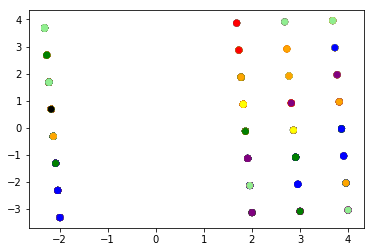

In [173]:
plt.scatter(out[:, 0],out[:,1],c= colors)

In [ ]:
# so we can see, there are more 'not str democrates' people think the budget is 'too much', and more'not str republic'
# think 'all right', and more 'republic' people think 'too little' than other party affilation in the same answer questions.
